In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def mostra_img(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

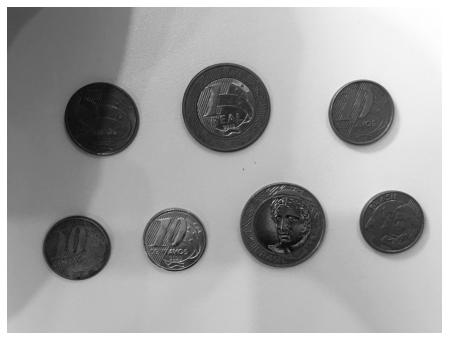

In [ ]:
img = cv2.imread('/content/moedas02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostra_img(gray)

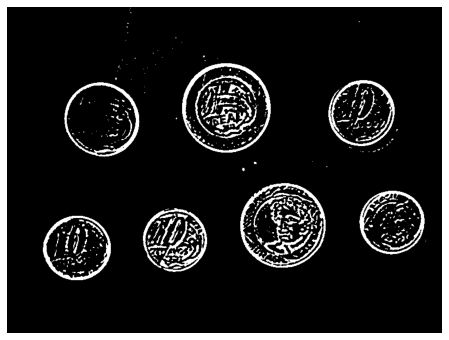

In [ ]:
img_processsada = img.copy()
desfoque = cv2.GaussianBlur(gray, (7,7), 0)

adapt_gauss = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,
                                    15, 3)

mostra_img(adapt_gauss)

In [ ]:
kernel = np.ones((3,3), np.uint8)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


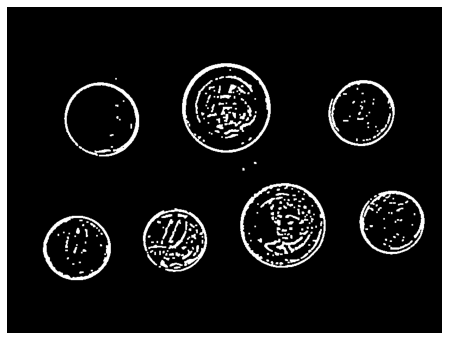

In [ ]:
erosao = cv2.erode(adapt_gauss, kernel)
dilatacao = cv2.dilate(erosao, kernel)
mostra_img(dilatacao)

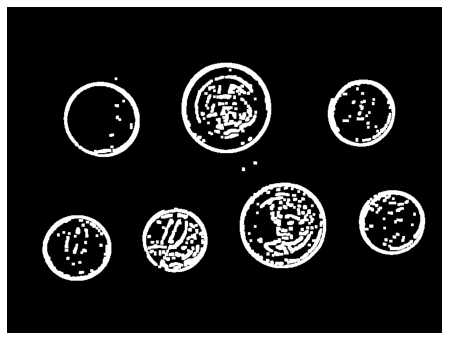

In [ ]:
dilatacao = cv2.dilate(erosao, kernel, iterations =2)
mostra_img(dilatacao)

In [ ]:
elementos = dilatacao.copy()

contornos, hierarquia = cv2.findContours(elementos, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

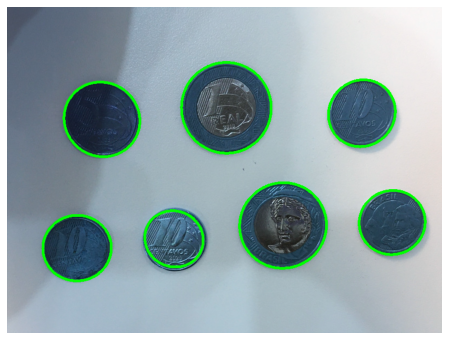

In [ ]:
img_processsada = img.copy()
for i in contornos:
  area = cv2.contourArea(i)
  if len(i) >= 100:
    elipse = cv2.fitEllipse(i)
    cv2.ellipse(img_processsada, elipse, (0, 255, 0), 3)
mostra_img(img_processsada)

#Sobreposição como limiar adaptativo

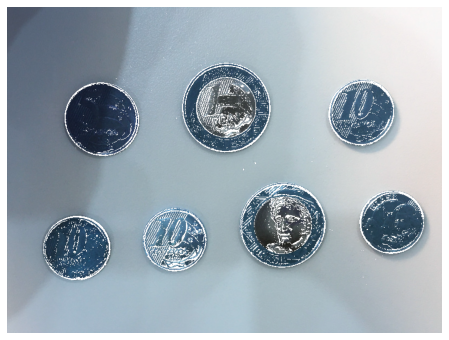

In [ ]:
adapt_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 11)

sobrepor = cv2.add(img, cv2.cvtColor(adapt_gauss, cv2.COLOR_GRAY2BGR))
mostra_img(sobrepor)

#Operador Sobel

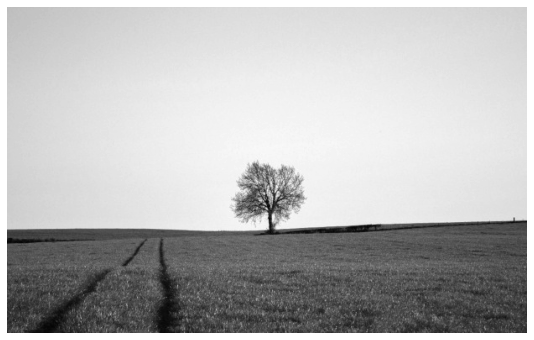

In [ ]:
img = cv2.imread('/content/paisagem01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostra_img(gray)

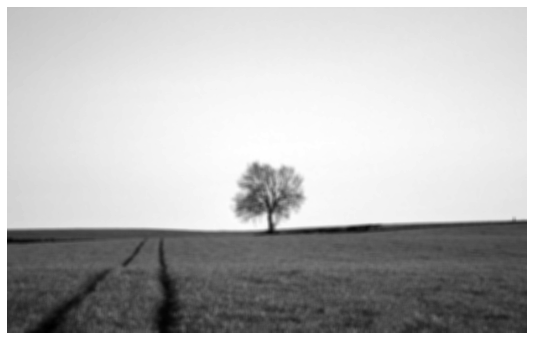

In [ ]:
desfoque = cv2.GaussianBlur(gray, (5, 5), 9)
mostra_img(desfoque)

In [ ]:
#Primeira maneira

k_sobelX = np.array(([-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]), np.float32)

k_sobelY = np.array(([-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]), np.float32) 


sobel_x = cv2.filter2D(desfoque, cv2.CV_64F, k_sobelX)
sobel_y = cv2.filter2D(desfoque, cv2.CV_64F, k_sobelY)

In [ ]:
#Segunda maneira

sobel_x = cv2.Sobel(desfoque, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(desfoque, cv2.CV_64F, 0, 1, ksize=3)

In [ ]:
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

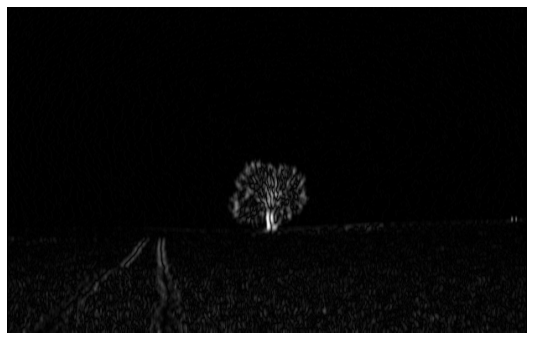

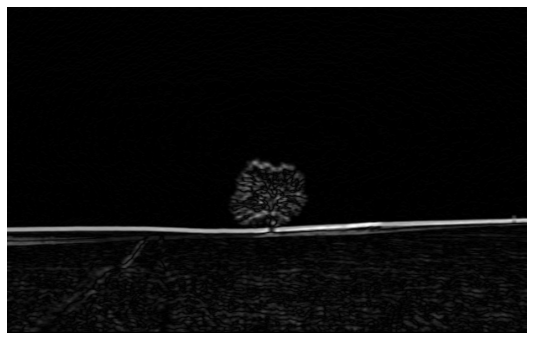

In [ ]:
mostra_img(sobel_x)
mostra_img(sobel_y)

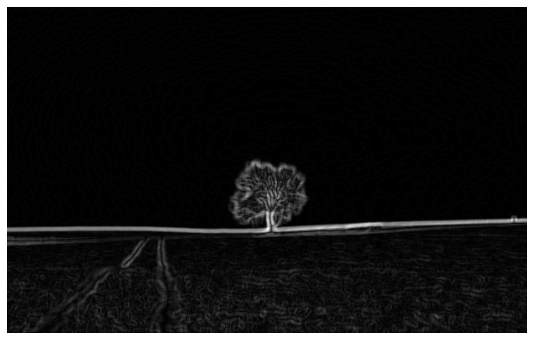

In [ ]:
sobel = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta = 0.5, gamma = 0)
mostra_img(sobel)

#Canny Edge

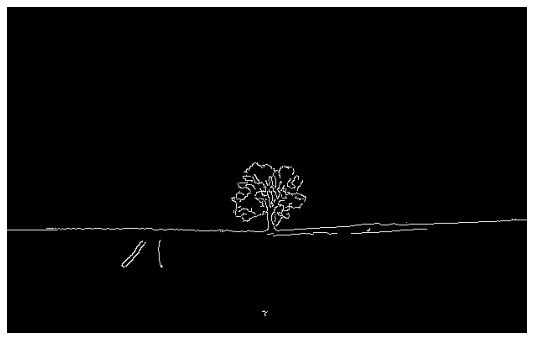

In [ ]:
canny = cv2.Canny(desfoque, 50, 100)
mostra_img(canny)

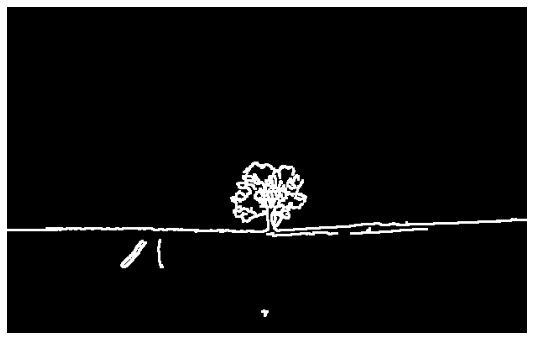

In [ ]:
dilatacao = cv2.dilate(canny, np.ones((3,3), np.uint8))
mostra_img(dilatacao)

In [ ]:
def segmentacao_bordas(img):
  desfoque = cv2.GaussianBlur(img, (5, 5), 0)

  #Operador Sobel
  sobel_x = cv2.Sobel(desfoque, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y = cv2.Sobel(desfoque, cv2.CV_64F, 0, 1, ksize=3)

  sobel_x = cv2.convertScaleAbs(sobel_x)
  sobel_y = cv2.convertScaleAbs(sobel_y)

  sobel = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta = 0.5, gamma = 0)

  #Operador Canny
  canny = cv2.Canny(desfoque, 80, 140)
  kernel = np.ones((3,3), np.uint8)
  dilatacao = cv2.dilate(canny, kernel, iterations=2)
  erosao = cv2.erode(dilatacao, kernel, iterations=1)

  imagens = [img, sobel, canny, erosao]
  titulos = ['Imagem Original', 'Sobel', 'Canny Edge', 'Canny Edge + Fechamento']

  fig = plt.gcf()
  fig.set_size_inches(18,12)

  for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(wspace=0.1)

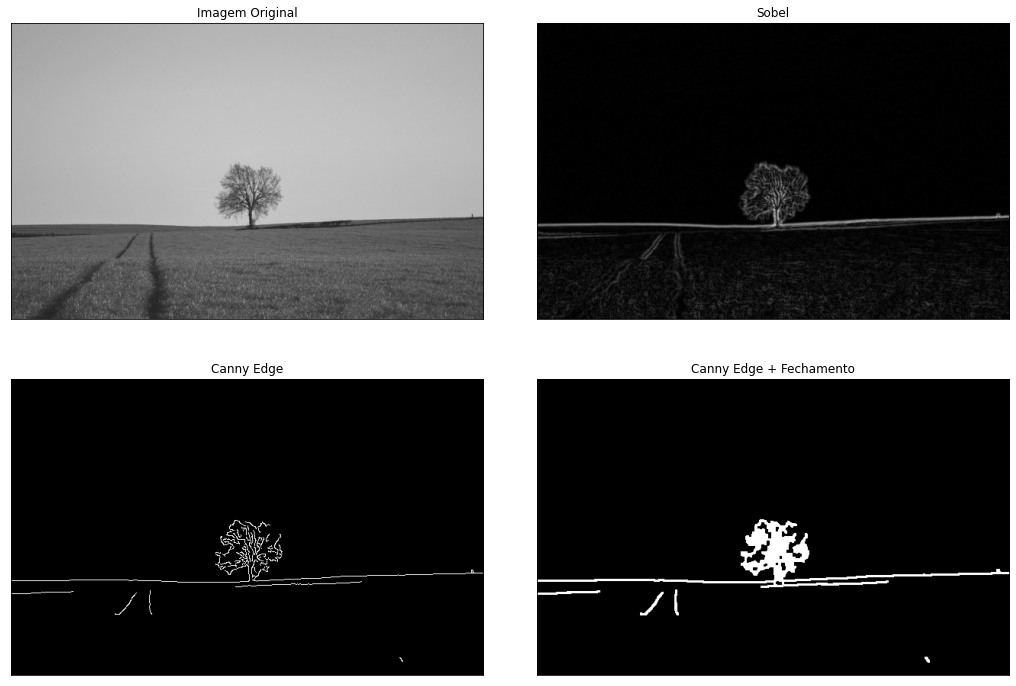

In [ ]:
segmentacao_bordas(gray)